In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# reading the dataset and storing them
df_cities = pd.read_csv("../Dataset/dim_cities.csv")
df_respondents = pd.read_csv("../Dataset/dim_repondents_updated.csv")
df_responses = pd.read_csv("../Dataset/fact_survey_responses.csv")

### Q1. What immediate improvements can we bring to the product? 

In [45]:
df_responses['Tried_before'].value_counts()

Tried_before
No     5119
Yes    4881
Name: count, dtype: int64

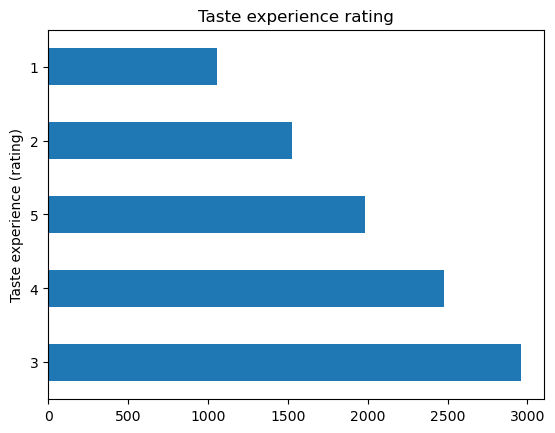

In [46]:
df_responses['Taste_experience'].value_counts().plot(kind='barh')

plt.title('Taste experience rating')
plt.ylabel('Taste experience (rating)')
plt.show()

In [47]:
df_responses['Reasons_preventing_trying'].value_counts()

Reasons_preventing_trying
Not available locally              2431
Health concerns                    2258
Not interested in energy drinks    2193
Unfamiliar with the brand          1850
Other                              1268
Name: count, dtype: int64

In [48]:
df = df_responses[df_responses['Reasons_preventing_trying'] == 'Not available locally'] \
            .merge(df_respondents[['Respondent_ID', 'City_ID']], on='Respondent_ID') \
            .merge(df_cities[['City_ID', 'City']], on='City_ID')

df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,City_ID,City
0,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,CT116,Hyderabad
1,103009,120039,Once a week,To stay awake during work/study,To enhance sports performance,No,Neutral,Effective,Yes,3,...,No,Yes,Other,Innovative bottle design,No,100-150,Other,Sports/exercise,CT116,Hyderabad
2,103012,120042,Rarely,To stay awake during work/study,To combat fatigue,Yes,Neutral,Dangerous,No,2,...,Yes,Yes,Online ads,Other,Yes,100-150,Online retailers,Social outings/parties,CT112,Mumbai
3,103013,120043,2-3 times a week,Before exercise,To enhance sports performance,No,Neutral,Healthy,Yes,4,...,Yes,No,Online ads,Innovative bottle design,No,50-99,Gyms and fitness centers,Studying/working late,CT113,Bangalore
4,103016,120046,Daily,Before exercise,Increased energy and focus,No,Neutral,Effective,Yes,3,...,Yes,Yes,Online ads,Compact and portable cans,Yes,Above 150,Supermarkets,Studying/working late,CT114,Chennai


In [49]:
df['City'].value_counts()

City
Bangalore    709
Hyderabad    511
Mumbai       236
Chennai      231
Pune         222
Kolkata      204
Jaipur       121
Delhi         75
Ahmedabad     64
Lucknow       58
Name: count, dtype: int64

In [50]:
d = df_cities[['City', 'Tier']].drop_duplicates()
d

,City,Tier
0,Delhi,Tier 1
1,Mumbai,Tier 1
2,Bangalore,Tier 1
3,Chennai,Tier 1
4,Kolkata,Tier 2
5,Hyderabad,Tier 1
6,Ahmedabad,Tier 2
7,Pune,Tier 2
8,Jaipur,Tier 2
9,Lucknow,Tier 2


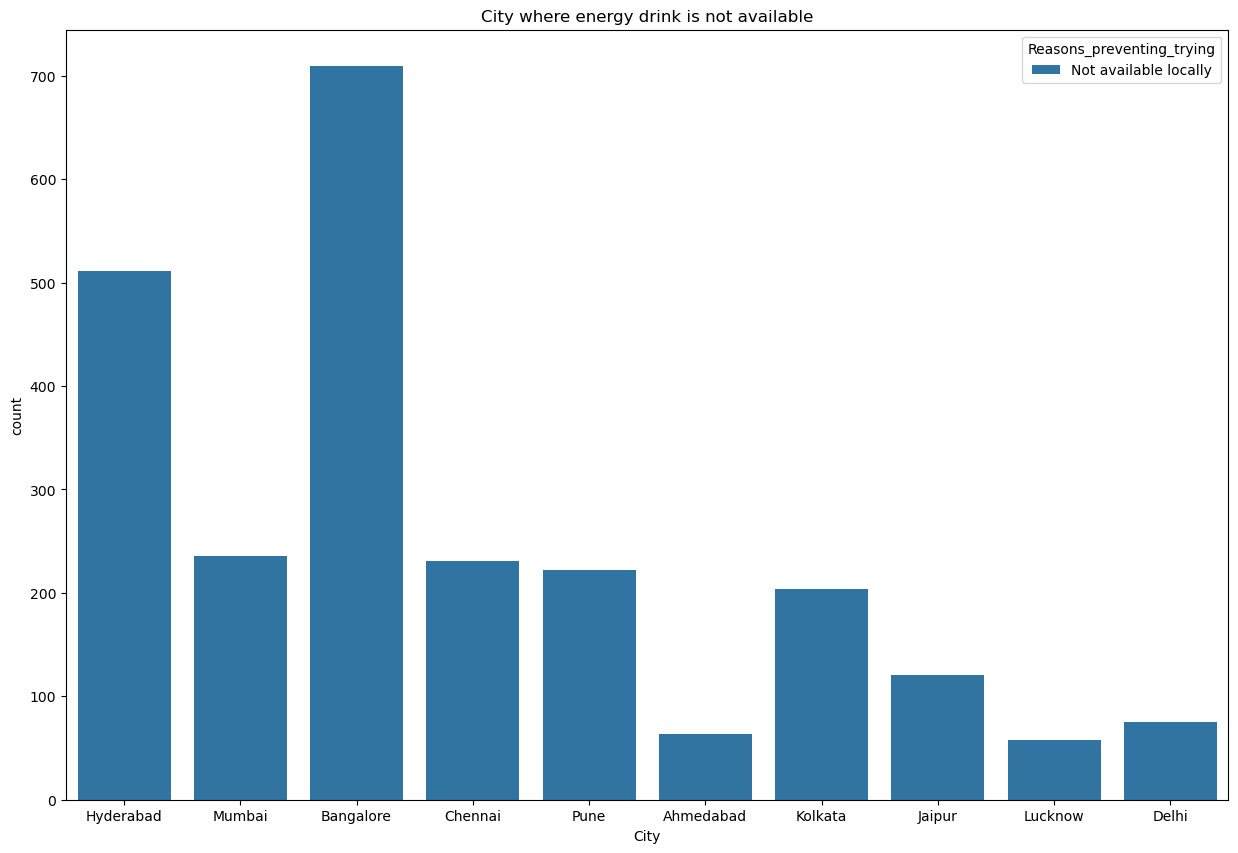

In [51]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='City', hue='Reasons_preventing_trying')

plt.title('City where energy drink is not available')
plt.show()

Text(0, 0.5, 'Count')

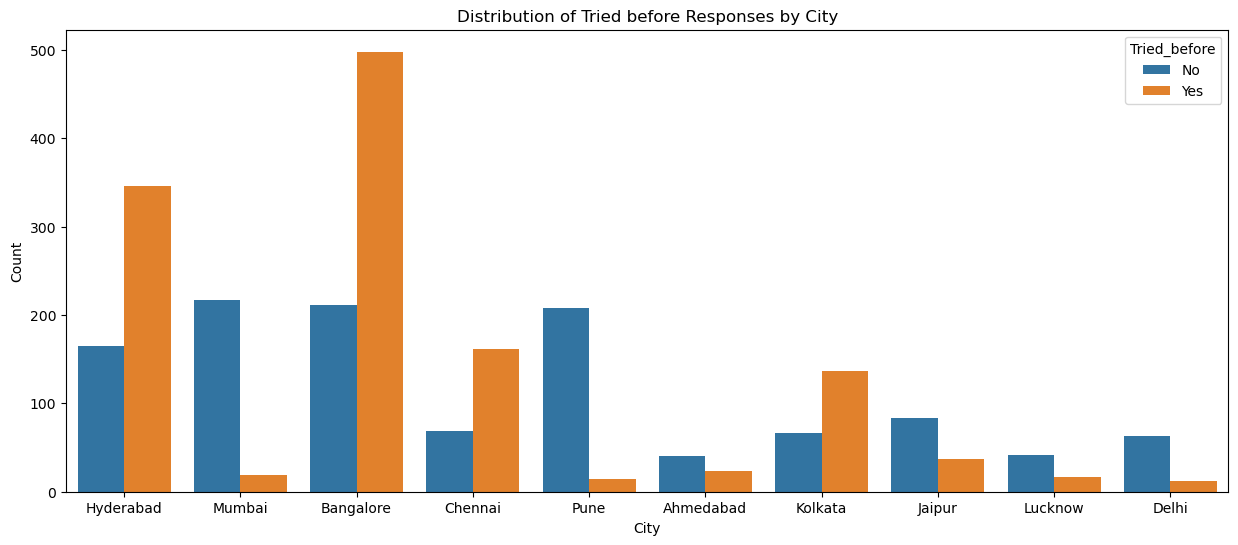

In [52]:
plt.figure(figsize=(15, 6))

sns.countplot(data=df, x='City', hue='Tried_before')

# Add title and labels
plt.title('Distribution of Tried before Responses by City')
plt.xlabel('City')
plt.ylabel('Count')

The immediate improvements we can bring to the product is making it available in Tier 1 city. we can see Top 4 tier 1 city has issue that there are no available of the energy drink. by seeing the second graph bangalore is the city which has more consume the energy drink and in not available it is at top. the first thing to imporve or increase distribution in tier 1 city and then we can have a look on taste as overall rating is avrage 

### Q2. What should be the ideal price of our product? 

In [43]:
df_responses['Price_range'].value_counts()

Price_range
50-99        4288
100-150      3142
Above 150    1561
Below 50     1009
Name: count, dtype: int64

In [65]:
df = df_responses \
            .merge(df_respondents[['Respondent_ID', 'City_ID', 'Age']], on='Respondent_ID') \
            .merge(df_cities[['City_ID', 'Tier', 'City']], on='City_ID')

df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,City_ID,Age,Tier,City
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,CT117,15-18,Tier 2,Ahmedabad
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,CT118,19-30,Tier 2,Pune
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,CT116,15-18,Tier 1,Hyderabad
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,CT113,31-45,Tier 1,Bangalore
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,CT120,19-30,Tier 2,Lucknow


<AxesSubplot:xlabel='Price_range', ylabel='count'>

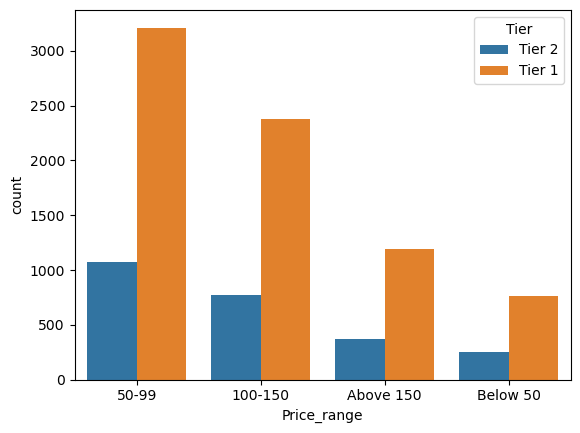

In [ ]:
sns.countplot(data=df, x='Price_range', hue='Tier')

<AxesSubplot:xlabel='Limited_edition_packaging', ylabel='count'>

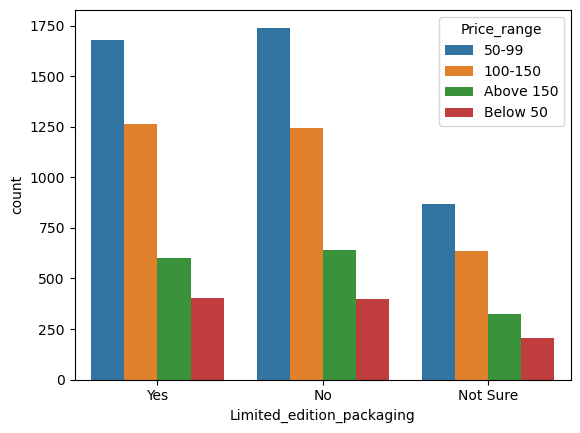

In [60]:
sns.countplot(data=df, x='Limited_edition_packaging', hue='Price_range')

<AxesSubplot:xlabel='Limited_edition_packaging', ylabel='count'>

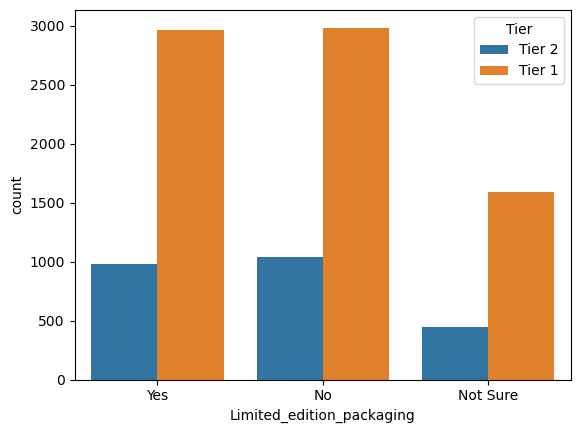

In [61]:
sns.countplot(data=df, x='Limited_edition_packaging', hue='Tier')

<AxesSubplot:xlabel='Price_range', ylabel='count'>

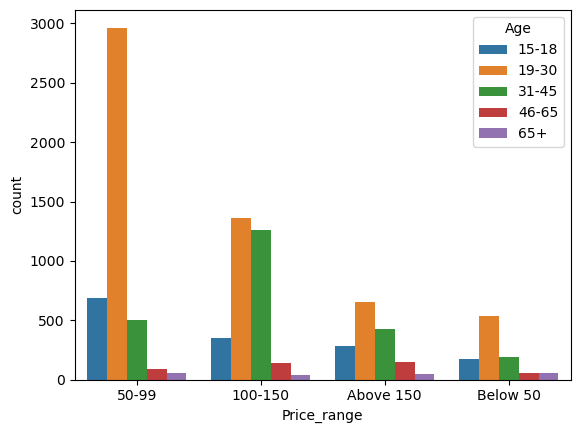

In [66]:
sns.countplot(data=df, x='Price_range', hue='Age')

We can see by age group, limited edition packaging, city tier. we can set the price 50-99 in both tier 1 and tier 2 city without Limited edition packaging and price 100-150 for Limited edition packaging. 

### Q3. What kind of marketing campaigns, offers, and discounts we can run? 

In [81]:
df = df_responses \
            .merge(df_respondents[['Respondent_ID', 'City_ID', 'Age_Group', 'Gender']], on='Respondent_ID') \
            .merge(df_cities[['City_ID', 'Tier', 'City']], on='City_ID')

df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,City_ID,Age_Group,Gender,Tier,City
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,CT117,Young Adult,Female,Tier 2,Ahmedabad
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,CT118,Young Adult,Male,Tier 2,Pune
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,CT116,Young Adult,Male,Tier 1,Hyderabad
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,CT113,Middle Adult,Female,Tier 1,Bangalore
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,CT120,Young Adult,Female,Tier 2,Lucknow


<AxesSubplot:xlabel='Marketing_channels', ylabel='count'>

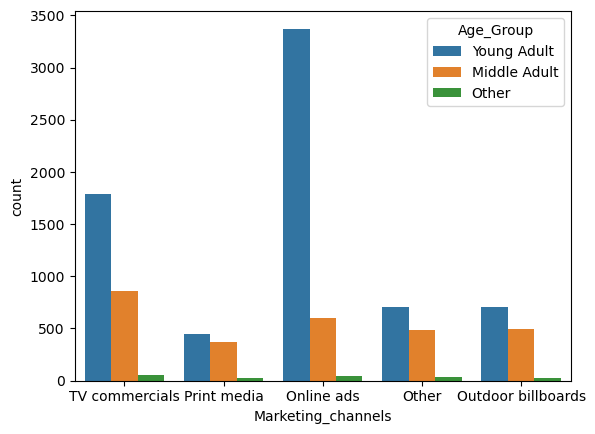

In [82]:
sns.countplot(data=df, x='Marketing_channels', hue='Age_Group')

<AxesSubplot:xlabel='Marketing_channels', ylabel='count'>

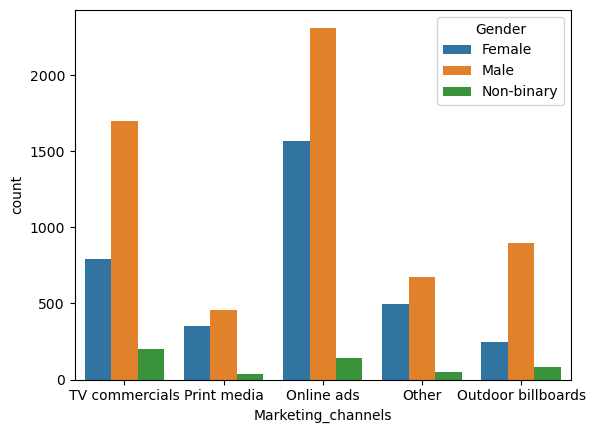

In [83]:
sns.countplot(data=df, x='Marketing_channels', hue='Gender')

<AxesSubplot:xlabel='Marketing_channels', ylabel='count'>

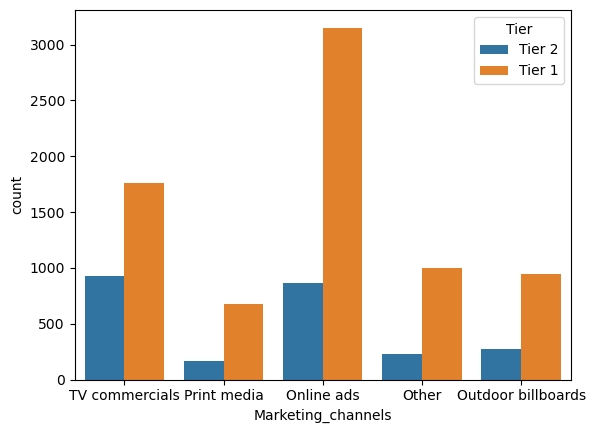

In [84]:
sns.countplot(data=df, x='Marketing_channels', hue='Tier')

We should do online ads as the marketing campaigns as by gender, age group, tier online ads perform very well. We can being limited editotion packaging as a offer and in discount pracing between 50-99 rs

### Q4. Who can be a brand ambassador, and why?

In [85]:
df_responses.Consume_time.value_counts()

Consume_time
To stay awake during work/study    3409
Before exercise                    3148
For mental alertness               1995
Throughout the day                 1448
Name: count, dtype: int64

In [86]:
df_responses.Consume_reason.value_counts()

Consume_reason
Increased energy and focus       3574
To combat fatigue                2428
To enhance sports performance    1604
To boost performance             1514
Other                             880
Name: count, dtype: int64

In [87]:
df_responses.Typical_consumption_situations.value_counts()

Typical_consumption_situations
Sports/exercise           4494
Studying/working late     3231
Social outings/parties    1487
Other                      491
Driving/commuting          297
Name: count, dtype: int64

According to my view i would consider Arshdeep Singh to be brand ambassador. due to reason like
- according to the our enery drink is consume which sport/exercise and arshdeep is a cricketer.
- most of the responses responded to consume reason is to increase enery and focus and arshdeep is a left-arm medium-fast bowler who need energy and focus as well
- Arshdeep is the key player in world t20 who boaled the last over making india win t20 world cup after 18 year and after this he has gained popularity as well

### Q5. Who should be our target audience, and why?

In [111]:
df = df_responses \
            .merge(df_respondents[['Respondent_ID', 'City_ID', 'Age_Group', 'Age']], on='Respondent_ID') \
            .merge(df_cities[['City_ID', 'Tier']], on='City_ID')

df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,City_ID,Age_Group,Age,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,CT117,Young Adult,15-18,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,CT118,Young Adult,19-30,Tier 2
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,CT116,Young Adult,15-18,Tier 1
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,CT113,Middle Adult,31-45,Tier 1
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,CT120,Young Adult,19-30,Tier 2


<AxesSubplot:xlabel='Age_Group', ylabel='count'>

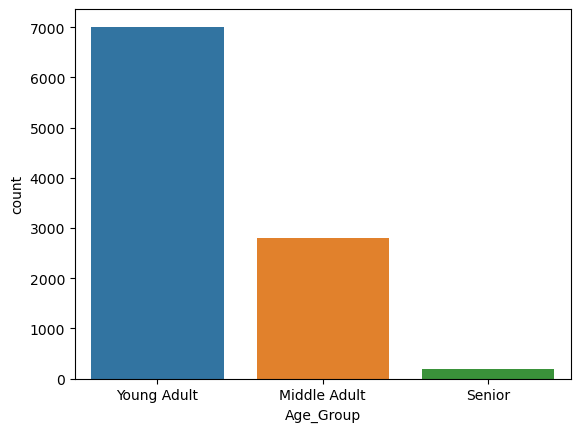

In [112]:
sns.countplot(data=df, x='Age_Group')

<AxesSubplot:xlabel='Tier', ylabel='count'>

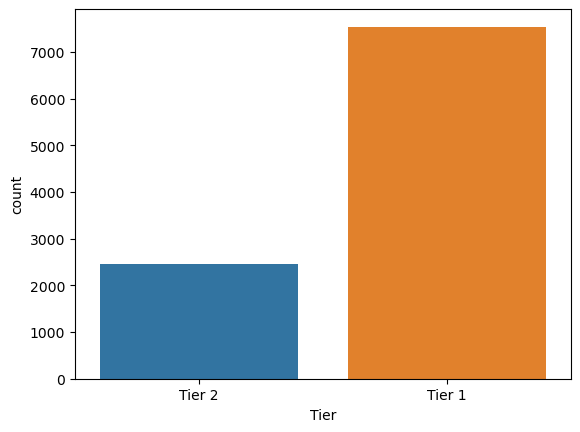

In [113]:
sns.countplot(data=df, x='Tier')

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

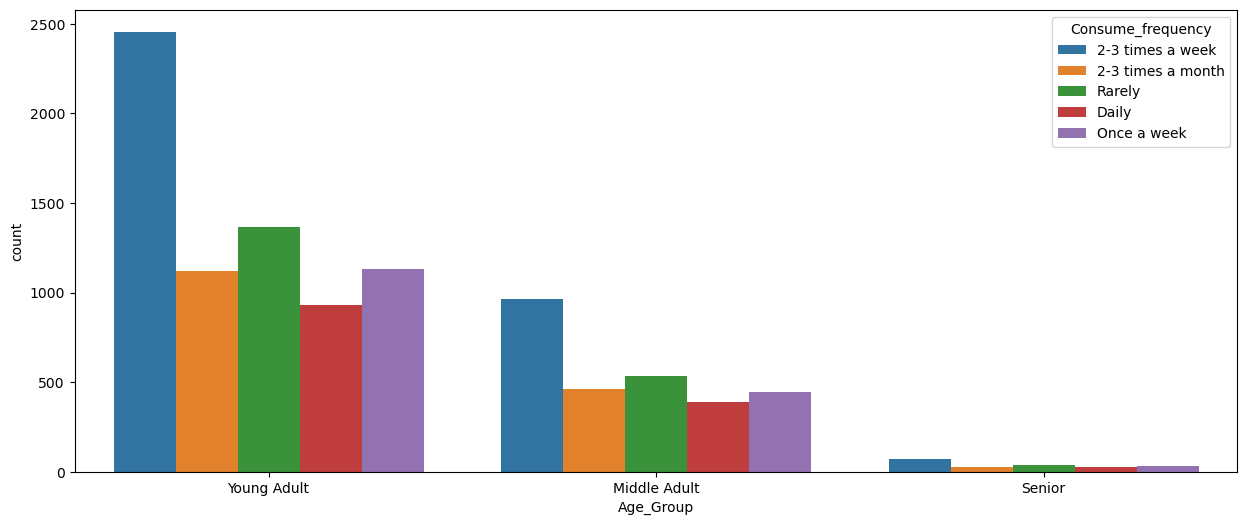

In [114]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Age_Group', hue='Consume_frequency')

Our target audience should be in the age group of young adult (15-30) and tier 1 city. due to most of our buyer are your adults and from a tier 1 city

### 